# Student Exam Scores Analysis with Pandas & Matplotlib

### 🎯 Objectives:
- Load and analyze the student exam dataset using **pandas**.
- Perform basic data exploration and analysis.
- Create plots using **matplotlib** and **seaborn**.
- Share observations and findings.


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
try:
    df = pd.read_csv("student_exam_scores.csv")
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File not found.")
except Exception as e:
    print(f"❌ Error: {e}")

# Display first rows
df.head()


✅ Dataset loaded successfully!


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


## Task 1: Load and Explore the Dataset
Steps:
1. Display first rows.
2. Check data types.
3. Inspect missing values.
4. Clean dataset if needed.


In [2]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [3]:
# Check missing values
df.isnull().sum()


student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [4]:
# Clean dataset (drop missing values if any)
df = df.dropna()
df.head()


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


## Task 2: Basic Data Analysis
1. Descriptive statistics.
2. Group analysis (attendance buckets).
3. Key observations.


In [5]:
# Descriptive statistics
df.describe()


,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [6]:
# Create attendance buckets for grouping
df['attendance_group'] = pd.cut(
    df['attendance_percent'],
    bins=[0,60,80,100],
    labels=['Low','Medium','High']
)

# Mean exam score by attendance group
group_means = df.groupby('attendance_group')['exam_score'].mean()
group_means


C:\Users\innoc\AppData\Local\Temp\ipykernel_17424\1565070778.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby('attendance_group')['exam_score'].mean()


attendance_group
Low       31.725641
Medium    33.705263
High      35.201176
Name: exam_score, dtype: float64

In [7]:
# Observations
print("🔎 Observations:")
print("- Students with higher attendance generally have higher exam scores.")
print("- Hours studied and previous scores may also influence performance.")


🔎 Observations:
- Students with higher attendance generally have higher exam scores.
- Hours studied and previous scores may also influence performance.


## Task 3: Data Visualization
We will create:
1. Line chart → Exam scores by student index.
2. Bar chart → Average exam scores by attendance group.
3. Histogram → Distribution of hours studied.
4. Scatter plot → Hours studied vs Exam score.


In [8]:
# Use Seaborn style
plt.style.use("seaborn-v0_8")


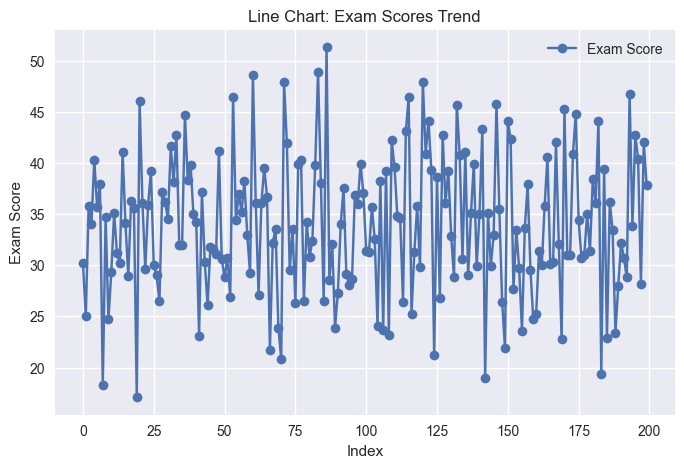

In [9]:
# 1. Line chart
plt.figure(figsize=(8,5))
plt.plot(df.index, df['exam_score'], marker='o', label='Exam Score')
plt.title("Line Chart: Exam Scores Trend")
plt.xlabel("Index")
plt.ylabel("Exam Score")
plt.legend()
plt.show()


C:\Users\innoc\AppData\Local\Temp\ipykernel_17424\2843316508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette="viridis")


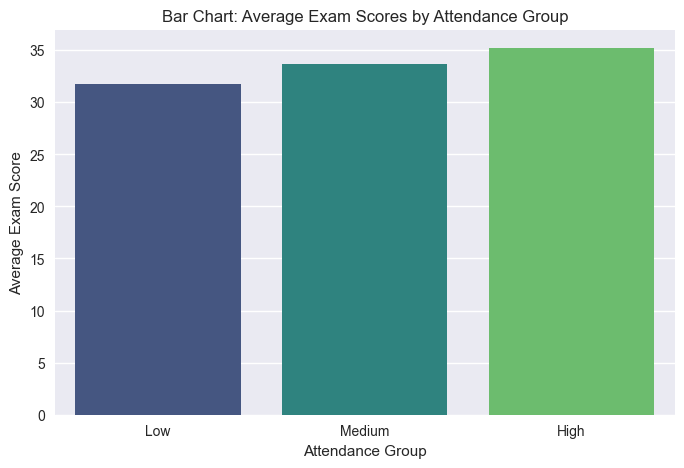

In [10]:
# 2. Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=group_means.index, y=group_means.values, palette="viridis")
plt.title("Bar Chart: Average Exam Scores by Attendance Group")
plt.xlabel("Attendance Group")
plt.ylabel("Average Exam Score")
plt.show()


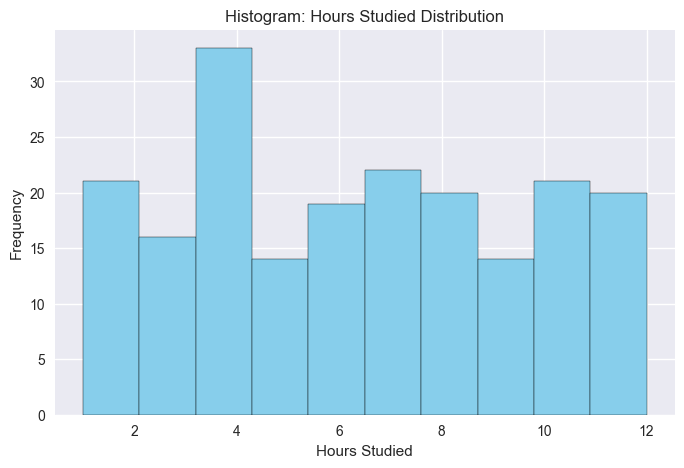

In [11]:
# 3. Histogram
plt.figure(figsize=(8,5))
plt.hist(df['hours_studied'], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram: Hours Studied Distribution")
plt.xlabel("Hours Studied")
plt.ylabel("Frequency")
plt.show()


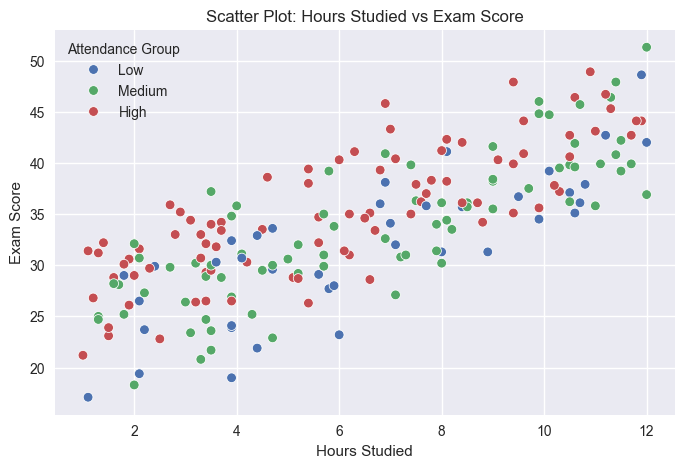

In [12]:
# 4. Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x="hours_studied", y="exam_score", hue="attendance_group", data=df)
plt.title("Scatter Plot: Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend(title="Attendance Group")
plt.show()


## ✅ Conclusion & Findings
- Higher attendance appears to correlate with better exam scores.  
- Students who study more hours generally perform better, though previous scores and sleep hours also contribute.  
- Visualizations highlight patterns between effort, attendance, and exam performance.  
